In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("abalone.csv")
df.head(10)

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
7,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
8,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19
9,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14


In [3]:
df.shape

(4176, 9)

In [4]:
df.columns=['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings(age)']

In [5]:
df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings(age)
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [6]:
df.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole weight      float64
shucked weight    float64
viscera weight    float64
shell weight      float64
rings(age)          int64
dtype: object

In [7]:
df.corr()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings(age)
length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
rings(age),0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


In [8]:
df.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings(age)
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


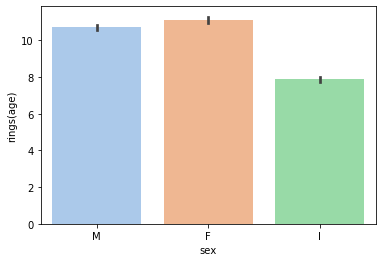

In [9]:
x=df['sex']
y=df['rings(age)']
sns.barplot(x,y,data = df, palette ='pastel')

In [10]:
df.corr()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings(age)
length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
rings(age),0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


In [11]:
dfcor=df.corr()

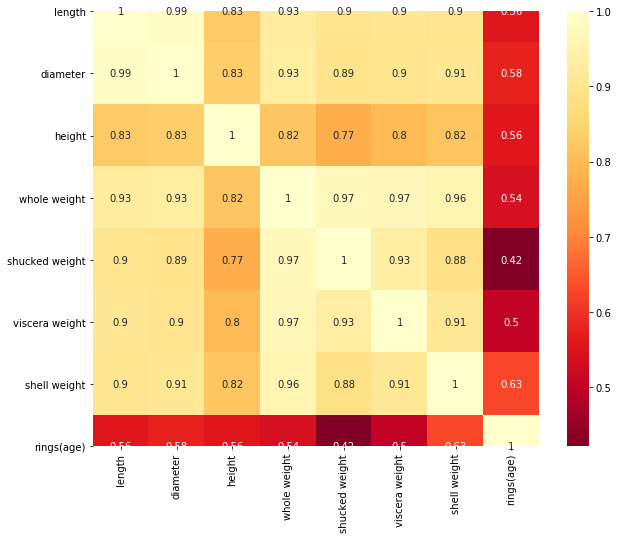

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

In [13]:
df['sex'].value_counts()

M    1527
I    1342
F    1307
Name: sex, dtype: int64

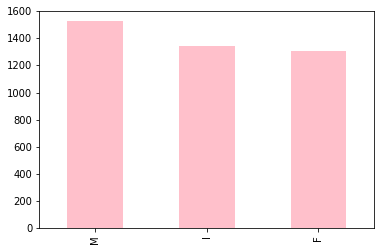

In [14]:
df['sex'].value_counts().plot.bar(color="pink")

In [15]:
df.groupby('whole weight')['rings(age)'].mean()

whole weight
0.0020     1.0
0.0080     3.0
0.0105     4.0
0.0130     3.0
0.0140     3.0
          ... 
2.5500    14.0
2.5550    11.0
2.6570    11.0
2.7795    12.0
2.8255    17.0
Name: rings(age), Length: 2429, dtype: float64

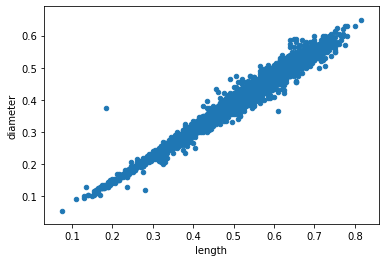

In [16]:
df.plot.scatter('length','diameter')

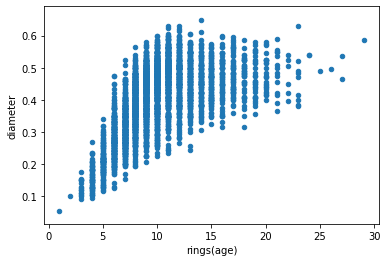

In [17]:
df.plot.scatter('rings(age)','diameter')

In [18]:
pd.crosstab(df['whole weight'],df['rings(age)'])

rings(age),1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,29
whole weight,,,,,,,,,,,,,,,,,,,,,
0.0020,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.0080,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.0105,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.0130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.0140,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.5500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.5550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.6570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


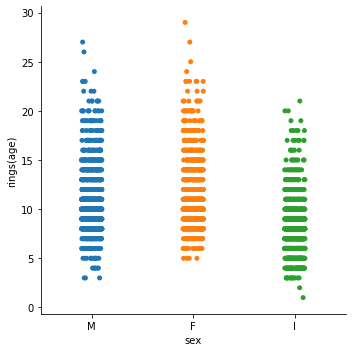

In [19]:
sns.catplot('sex','rings(age)',kind='strip',data=df)

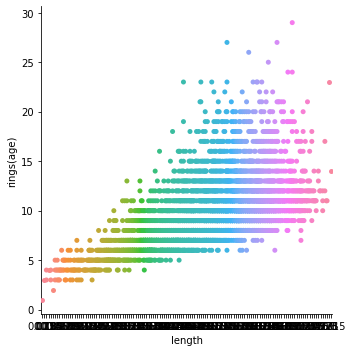

In [20]:
sns.catplot('length','rings(age)',kind='swarm',data=df[:-3])

In [21]:
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings(age)        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1f37a6d68c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f37a6d8a08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f37a6d4e88>],
 'medians': [<matplotlib.lines.Line2D at 0x1f37a6deb08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f37a6dec08>],
 'means': []}

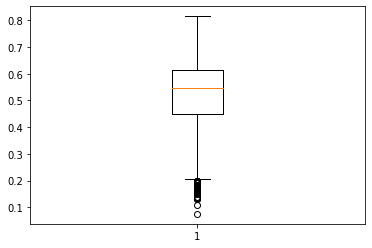

In [22]:
plt.boxplot(df['length'])

In [23]:
 from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [24]:
transformed_sex_feature = OneHotEncoder().fit_transform(df['sex'].values.reshape(-1,1)).toarray()
df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
df = pd.concat([df, df_sex_encoded], axis=1)

In [25]:
df.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings(age),sex_0,sex_1,sex_2
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,0.0,1.0
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.0,0.0,0.0
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,0.0,1.0
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,1.0,0.0
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0.0,1.0,0.0


In [26]:
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings(age)        0
sex_0             0
sex_1             0
sex_2             0
dtype: int64

In [27]:
# we have sex_0,sex_1,sex_2 lets drop sex
df.drop(['sex'],axis=1,inplace=True)


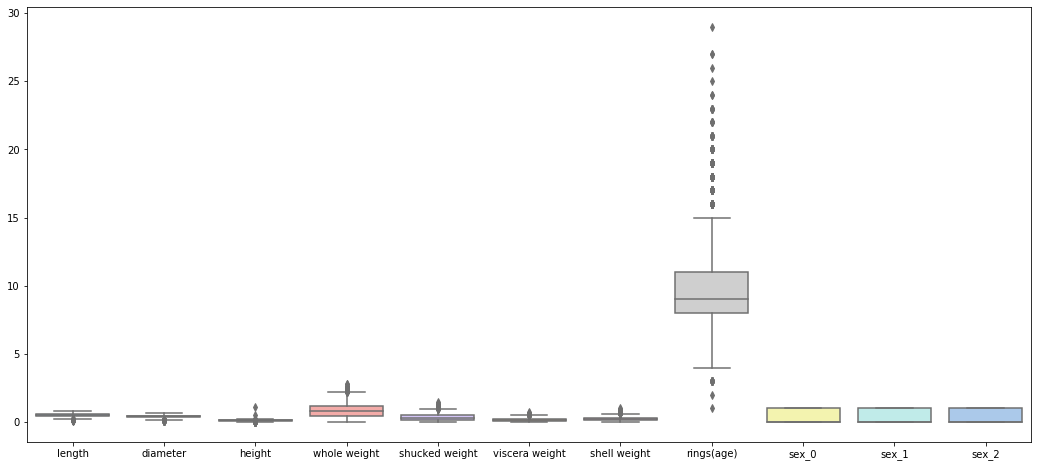

In [28]:
plt.figure(figsize = (18, 8))
sns.boxplot(data=df, palette ='pastel')

In [29]:
# treating outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[1.44900723 1.43989229 1.18425209 ... 0.67495143 0.68813926 1.31710822]
 [0.0498915  0.12201495 0.10824748 ... 1.4815881  0.68813926 0.75923905]
 [0.69955786 0.4322102  0.34735962 ... 0.67495143 0.68813926 1.31710822]
 ...
 [0.63279657 0.67624011 1.56553747 ... 0.67495143 0.68813926 1.31710822]
 [0.84097695 0.77700832 0.25042072 ... 1.4815881  0.68813926 0.75923905]
 [1.54879024 1.48238578 1.32642533 ... 0.67495143 0.68813926 1.31710822]]


In [30]:
threshold=3
print(np.where(z>3))

(array([   5,   71,   80,   82,  128,  162,  163,  164,  164,  164,  165,
        165,  166,  167,  169,  180,  231,  235,  235,  235,  236,  236,
        237,  237,  238,  269,  274,  276,  277,  293,  309,  312,  313,
        333,  350,  354,  357,  357,  361,  374,  415,  416,  427,  430,
        432,  468,  477,  479,  500,  525,  525,  529,  571,  627,  672,
        673,  674,  677,  693,  695,  695,  718,  718,  719,  719,  743,
        753,  755,  810,  890,  890,  890, 1047, 1050, 1050, 1051, 1192,
       1196, 1198, 1201, 1203, 1205, 1205, 1206, 1206, 1206, 1206, 1208,
       1208, 1256, 1416, 1416, 1417, 1421, 1425, 1426, 1426, 1426, 1427,
       1428, 1428, 1527, 1753, 1755, 1756, 1758, 1760, 1761, 1761, 1761,
       1762, 1762, 1762, 1820, 1981, 1985, 1986, 1986, 2050, 2089, 2107,
       2107, 2113, 2113, 2156, 2160, 2175, 2179, 2198, 2200, 2207, 2208,
       2273, 2274, 2304, 2333, 2333, 2333, 2334, 2343, 2357, 2367, 2380,
       2435, 2458, 2470, 2543, 2622, 2623, 2623, 2

In [31]:
df = df[(z < 3).all(axis=1)]

In [32]:
df.shape

(4026, 11)

In [33]:
df.head()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings(age),sex_0,sex_1,sex_2
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,0.0,1.0
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.0,0.0,0.0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,0.0,1.0
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,1.0,0.0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0.0,1.0,0.0


In [34]:
df.dtypes

length            float64
diameter          float64
height            float64
whole weight      float64
shucked weight    float64
viscera weight    float64
shell weight      float64
rings(age)          int64
sex_0             float64
sex_1             float64
sex_2             float64
dtype: object

In [35]:
columns_target=['rings(age)']
columns_train=['length','diameter','height','whole weight','viscera weight','shell weight','sex_0','sex_1','sex_2','shucked weight']
x=df[columns_train]
y=df[columns_target]

In [36]:
from sklearn.preprocessing import OneHotEncoder


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [38]:
from sklearn.preprocessing import StandardScaler


In [39]:
df.head()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings(age),sex_0,sex_1,sex_2
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,0.0,1.0
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.0,0.0,0.0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,0.0,1.0
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,1.0,0.0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0.0,1.0,0.0


In [40]:
df.dtypes

length            float64
diameter          float64
height            float64
whole weight      float64
shucked weight    float64
viscera weight    float64
shell weight      float64
rings(age)          int64
sex_0             float64
sex_1             float64
sex_2             float64
dtype: object

In [41]:
df.isnull().sum()

length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings(age)        0
sex_0             0
sex_1             0
sex_2             0
dtype: int64

In [42]:
lr=LinearRegression()

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=88,stratify=y)

In [44]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
lr.score(x_train,y_train)

0.5228060336499483

In [46]:
x_test.shape

(886, 10)

In [47]:
lr.score(x_test,y_test)

0.5370556256436885

In [48]:
y_test.shape

(886, 1)

In [49]:
x_train.shape

(3140, 10)

In [50]:
lm=LinearRegression()

In [51]:
y_train.shape

(3140, 1)

In [52]:
logreg = LogisticRegression()

In [53]:
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
logreg.score(x_train,y_train)

0.2659235668789809

In [55]:
logreg.score(x_test,y_test)

0.24379232505643342

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.23024830699774265

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=150)
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=150, verbose=0,
                      warm_start=False)

In [58]:
rfr.score(x_train,y_train)

0.9334403010187224

In [59]:
rfr.score(x_test,y_test)

0.5342095930395379

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


knn=KNeighborsClassifier()
score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print('accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(knn,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

accuracy score: [0.20418204 0.25990099 0.22981366 0.24438903 0.26190476]
Mean Scores 0.24003809717037697
Standard deviation 0.02136263964475599
Y Prediction values
[ 6 10  8 ... 10 11 11]


array([[  0,   9,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  5,  22,  14,   6,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  2,  25,  29,  33,  19,   2,   1,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,  10,  31, 111,  73,  18,   9,   1,   4,   1,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   3,  18,  98, 130,  94,  39,   6,   3,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   1,   7,  47, 103, 165, 138,  60,  23,  10,   6,   3,   3,
          0,   0,   0,   0],
       [  0,   1,   3,  21,  62, 161, 216, 139,  58,  12,   5,   2,   3,
          2,   1,   0,   0],
       [  0,   0,   3,  14,  32, 103, 170, 164,  84,  23,  16,   3,   5,
          6,   0,   2,   0],
       [  0,   0,   1,   4,  15,  66, 141, 112,  86,  21,  16,   5,   1,
          0,   3,   0,   1],
       [  0,   0,   0,   3,  16,  23,  61,  70,  42,  17,  11,   4,   1,
         

In [61]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    score=cross_val_score(svc,x,y,cv=5)

    print('Mean Scores',score.mean())
    print('Standard deviation',score.std())

    y_pred=cross_val_predict(svc,x,y,cv=5)


    conf_mat=confusion_matrix(y,y_pred)
    print(conf_mat)

In [62]:
svmkernel('rbf')

Mean Scores 0.23973884491479452
Standard deviation 0.009598218694694785
[[  0   0   0   0  10   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  49   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 112   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 218  17  22   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 230  67  88   6   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 122 174 226  44   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  68 142 289 186   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0  41  78 237 264   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0  23  53 139 249   8   0   0   0   0   0   0   0   0]
 [  0   0   0   0   5  17 113 111   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   4  20  83  82  10   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2  12  54  49   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   9  46  45   1   0   0   0   0   0   0   0   0]
 [  0

In [63]:
svmkernel('poly')

Mean Scores 0.20503497800477505
Standard deviation 0.024547007842293227
[[  0   0   0   0   0  10   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  45   4   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 107   6   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 230  27   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 312  78   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 328 219  19   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 247 339  99   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 161 308 153   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  92 199 176   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  33 143  71   4   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  30 110  52   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  19  75  23   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   7  70  24   0   0   0   0   0   0   0   0   0]
 [  0

In [64]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.0

In [65]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=250)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.14221218961625282
[[ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  2 16  1  0  2  0  0  1  0  0  0  0  0  0]
 [ 0  1  0 15 15  7  2 13  0  0  2  0  0  0  0  0  2]
 [ 0  0  0 18  6 24 17 16  0  1  4  0  0  0  0  0  0]
 [ 0  0  0 16  6 25 51 12  0  0  0  0  0  0  0  0 14]
 [ 0  0  0 13  2 11 55 24  0  0  1  0  0  0  0  0 45]
 [ 0  0  0  6  1  8 37 15  0  1  0  0  0  0  0  0 69]
 [ 0  0  0  6  0  2 26 10  0  0  0  0  0  0  0  0 60]
 [ 0  0  0  6  0  4 11  5  0  0  0  0  0  0  0  0 29]
 [ 0  0  0  1  0  1 10 10  0  0  0  0  0  0  0  0 22]
 [ 0  0  0  3  0  1  7  1  0  0  0  0  0  0  0  0 14]
 [ 0  0  0  1  0  1  4  4  0  0  0  0  0  0  0  0 12]
 [ 0  0  0  1  0  2  1  3  0  0  0  0  0  0  0  0  7]
 [ 0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  8]
 [ 0  0  0  1  0  0  0  2  0  0  0  0  0  0  0  0  4]]
              precision    recall  f1-score   support

      

In [66]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [67]:
predmnb=mnb.predict(x_test)
print(accuracy_score(predmnb,y_test))

0.19751693002257337


In [68]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [69]:
predgnb=gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))

0.23927765237020315


In [70]:
#lets try classification for better accuracy(coverting the model into classification type)

In [71]:
agegrade = []
for i in df['rings(age)']:
    if i >= 1 and i <= 14:
        agegrade.append('0')
    elif i >= 14 and i <=29 :
        agegrade.append('1')
    
df['agegrade'] = agegrade

In [72]:
columns_target=['agegrade']
columns_train=['length','diameter','height','whole weight','viscera weight','shell weight','sex_0','sex_1','sex_2','shucked weight']
x=df[columns_train]
y=df[columns_target]

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [74]:
pca_new = PCA(n_components=10)
x_new = pca_new.fit_transform(x)


In [75]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25,random_state=78)

In [76]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3019, 10)
(3019, 1)
(1007, 10)
(1007, 1)


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

In [78]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score)

[[929   7]
 [ 65   6]]
0.9285004965243296


In [79]:
#now accuracy has improved lets try other algorithms

In [80]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=200)
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

In [82]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score)

[[925  11]
 [ 60  11]]
0.929493545183714


In [83]:
from sklearn.svm import SVC

In [84]:
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
lin_svc=rf.predict(x_test)

In [85]:
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score)

[[925  11]
 [ 60  11]]
0.929493545183714


In [86]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    score=cross_val_score(svc,x,y,cv=10)

    print('Mean Scores',score.mean())
    print('Standard deviation',score.std())

    y_pred=cross_val_predict(svc,x,y,cv=10)


    conf_mat=confusion_matrix(y,y_pred)
    print(conf_mat)

In [87]:
svmkernel('rbf')

Mean Scores 0.9287148996636712
Standard deviation 0.0010323557185634394
[[3739    0]
 [ 287    0]]


In [88]:
svmkernel('poly')

Mean Scores 0.9284655231050676
Standard deviation 0.0009473354250939326
[[3738    1]
 [ 287    0]]


In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


knn=KNeighborsClassifier()
score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print('accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(knn,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

accuracy score: [0.9057072  0.93300248 0.9242236  0.92919255 0.93034826]
Mean Scores 0.9244948170388291
Standard deviation 0.009815906024956727
Y Prediction values
['0' '0' '0' ... '0' '0' '0']


array([[3691,   48],
       [ 256,   31]], dtype=int64)

In [90]:
dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,x,y,cv=5,scoring='f1_macro')
print('F1-score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

F1-score= [0.56310841 0.61969496 0.63699387 0.63097996 0.56257699]
Mean Scores 0.6026708366955603
Standard deviation 0.032990908875216864
Y Prediction values
['0' '0' '0' ... '1' '0' '0']


array([[3463,  276],
       [ 199,   88]], dtype=int64)

In [91]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=250)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.9314796425024826
[[916  20]
 [ 49  22]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       936
           1       0.52      0.31      0.39        71

    accuracy                           0.93      1007
   macro avg       0.74      0.64      0.68      1007
weighted avg       0.92      0.93      0.92      1007



In [92]:
# ada boost classifier works best

In [98]:
from sklearn.externals import joblib
joblib.dump(ad,'adabalone.obj')
ad_from_joblib=joblib.load('adabalone.obj')
